# Unit 5 - Financial Planning

In [186]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

import numpy as np
import pandas as pd
import os
import alpaca_trade_api as tradeapi
import datetime as dt
import pytz

%matplotlib inline

In [187]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [188]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [189]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]
eth_data = requests.get(eth_url).json()
eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]


In [190]:
# Fetch current BTC price
print(requests.get(btc_url).json())

# Fetch current ETH price
print(requests.get(eth_url).json())

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{'data': {'1': {'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'website_slug': 'bitcoin', 'rank': 1, 'circulating_supply': 19332800, 'total_supply': 19332800, 'max_supply': 21000000, 'quotes': {'USD': {'price': 28071.0, 'volume_24h': 23115378246, 'market_cap': 542369769760, 'percentage_change_1h': 0.395632182193818, 'percentage_change_24h': -1.02108125126724, 'percentage_change_7d': 2.26651465606806, 'percent_change_1h': 0.395632182193818, 'percent_change_24h': -1.02108125126724, 'percent_change_7d': 2.26651465606806}}, 'last_updated': 1680220774}}, 'metadata': {'timestamp': 1680220774, 'num_cryptocurrencies': 3119, 'error': None}}
{'data': {'1027': {'id': 1027, 'name': 'Ethereum', 'symbol': 'ETH', 'website_slug': 'ethereum', 'rank': 2, 'circulating_supply': 120448798, 'total_supply': 120448798, 'max_supply': 120448798, 'quotes': {'USD': {'price': 1794.91, 'volume_24h': 10973439979, 'market_cap': 216024475834, 'percentage_change_1h': 0.473821943340178, 'percentage_change_24h': 0.05335125

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [191]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [192]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("APCA_API_KEY_ID")
alpaca_secret_key = os.getenv("APCA_API_SECRET_KEY")
base_url = "https://paper-api.alpaca.markets"

# Create the Alpaca API object
api = tradeapi.REST(
	alpaca_api_key,
	alpaca_secret_key,
	api_version="v2"
)

In [193]:
# Format current date as ISO format
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, base_url, api_version='v2')


start_date = pd.Timestamp("2022-03-27", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-03-27", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG	
df_ticker = api.get_bars(
	tickers,
	timeframe,
	start=start_date,
	end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_ticker[df_ticker["symbol"] == "AGG"].drop('symbol', axis=1)
SPY = df_ticker[df_ticker["symbol"] == "SPY"].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_ticker = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])

# Preview DataFrame
df_ticker.head()

AGG                                       \
                             open      high      low   close    volume   
timestamp                                                                
2022-03-28 04:00:00+00:00  106.25  106.5252  106.160  106.36  16188038   
2022-03-29 04:00:00+00:00  106.61  106.8900  106.455  106.86  22782663   
2022-03-30 04:00:00+00:00  106.60  107.1500  106.590  107.15  23074521   
2022-03-31 04:00:00+00:00  107.17  107.3800  107.060  107.10  13788220   
2022-04-01 04:00:00+00:00  106.35  106.9500  106.250  106.75  11579091   

                                                      SPY                    \
                          trade_count        vwap    open     high      low   
timestamp                                                                     
2022-03-28 04:00:00+00:00       51656  106.295856  452.06  455.910  450.060   
2022-03-29 04:00:00+00:00       67269  106.734047  460.02  462.070  457.180   
2022-03-30 04:00:00+00:00       49910  107.007761  460.34  461.195  456.465   
2022-03-31 04:00:00+00:00       44817  107.229272  457.89  458.760  451.160   
2022-04-01 04:00:00+00:00       40126  106.667931  453.31  453.460  449.140   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2022-03-28 04:00:00+00:00  455.84  131687956     1192521  453.304450  
2022-03-29 04:00:00+00:00  461.53  173082835     1475317  459.634235  
2022-03-30 04:00:00+00:00  458.79  159109186     1316482  459.159046  
2022-03-31 04:00:00+00:00  451.64  119151277      751165  455.454712  
2022-04-01 04:00:00+00:00  452.92   88675787      624742  451.850852

In [194]:
# Pick AGG and SPY close prices
spy_close_price = SPY["close"][0]
agg_close_price = AGG["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $106.36
Current SPY closing price: $455.84


In [195]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22792.00
The current value of your 200 AGG shares is $21272.00


### Savings Health Analysis

In [196]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_value = 19385.986877
shares_value = 40616.500000

# Create savings DataFrame
df_savings = pd.DataFrame({"amount": [crypto_value + shares_value]}, index=["crypto", "shares"])
# Display savings DataFrame
display(df_savings)

,amount
crypto,60002.486877
shares,60002.486877


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

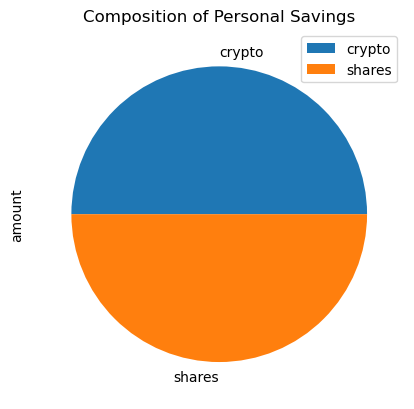

In [197]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [198]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_value + shares_value + emergency_fund

# Validate saving health
if total_savings > emergency_fund:
	print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
	print("Congratulations on reaching your financial goal!")
else:
	print(f"You are ${emergency_fund - total_savings} away from reaching your goal.")
	

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [199]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-03-27', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-03-27', tz='America/New_York').isoformat()

In [200]:
# Get 5 years' worth of historical data for SPY and AGG
mc_simulation = MCSimulation(
	portfolio_data = df_ticker,
	weights = [.40, .60],
	num_simulation = 1000,
	num_trading_days = 252*5
)
# Reorganize the DataFrame
# Separate ticker data
df_ticker = api.get_bars(
	tickers,
	timeframe,
	start=start_date,
	end=end_date
).df

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])
# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high      low   close    volume   
timestamp                                                                
2022-03-28 04:00:00+00:00  106.25  106.5252  106.160  106.36  16188038   
2022-03-29 04:00:00+00:00  106.61  106.8900  106.455  106.86  22782663   
2022-03-30 04:00:00+00:00  106.60  107.1500  106.590  107.15  23074521   
2022-03-31 04:00:00+00:00  107.17  107.3800  107.060  107.10  13788220   
2022-04-01 04:00:00+00:00  106.35  106.9500  106.250  106.75  11579091   

                                                      SPY                    \
                          trade_count        vwap    open     high      low   
timestamp                                                                     
2022-03-28 04:00:00+00:00       51656  106.295856  452.06  455.910  450.060   
2022-03-29 04:00:00+00:00       67269  106.734047  460.02  462.070  457.180   
2022-03-30 04:00:00+00:00       49910  107.007761  460.34  461.195  456.465   
2022-03-31 04:00:00+00:00       44817  107.229272  457.89  458.760  451.160   
2022-04-01 04:00:00+00:00       40126  106.667931  453.31  453.460  449.140   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2022-03-28 04:00:00+00:00  455.84  131687956     1192521  453.304450  
2022-03-29 04:00:00+00:00  461.53  173082835     1475317  459.634235  
2022-03-30 04:00:00+00:00  458.79  159109186     1316482  459.159046  
2022-03-31 04:00:00+00:00  451.64  119151277      751165  455.454712  
2022-04-01 04:00:00+00:00  452.92   88675787      624742  451.850852

In [201]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_thirty_year = MCSimulation(
	portfolio_data = df_stock_data,
	weights = [.40, .60],
	num_simulation = 1000,
	num_trading_days = 252*30
)

In [202]:
# Printing the simulation input data
mc_thirty_year.portfolio_data.head()

AGG                                       \
                             open      high      low   close    volume   
timestamp                                                                
2022-03-28 04:00:00+00:00  106.25  106.5252  106.160  106.36  16188038   
2022-03-29 04:00:00+00:00  106.61  106.8900  106.455  106.86  22782663   
2022-03-30 04:00:00+00:00  106.60  107.1500  106.590  107.15  23074521   
2022-03-31 04:00:00+00:00  107.17  107.3800  107.060  107.10  13788220   
2022-04-01 04:00:00+00:00  106.35  106.9500  106.250  106.75  11579091   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2022-03-28 04:00:00+00:00       51656  106.295856          NaN  452.06   
2022-03-29 04:00:00+00:00       67269  106.734047     0.004701  460.02   
2022-03-30 04:00:00+00:00       49910  107.007761     0.002714  460.34   
2022-03-31 04:00:00+00:00       44817  107.229272    -0.000467  457.89   
2022-04-01 04:00:00+00:00       40126  106.667931    -0.003268  453.31   

                                                                            \
                              high      low   close     volume trade_count   
timestamp                                                                    
2022-03-28 04:00:00+00:00  455.910  450.060  455.84  131687956     1192521   
2022-03-29 04:00:00+00:00  462.070  457.180  461.53  173082835     1475317   
2022-03-30 04:00:00+00:00  461.195  456.465  458.79  159109186     1316482   
2022-03-31 04:00:00+00:00  458.760  451.160  451.64  119151277      751165   
2022-04-01 04:00:00+00:00  453.460  449.140  452.92   88675787      624742   

                                                    
                                 vwap daily_return  
timestamp                                           
2022-03-28 04:00:00+00:00  453.304450          NaN  
2022-03-29 04:00:00+00:00  459.634235     0.012482  
2022-03-30 04:00:00+00:00  459.159046    -0.005937  
2022-03-31 04:00:00+00:00  455.454712    -0.015584  
2022-04-01 04:00:00+00:00  451.850852     0.002834

In [203]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/leandrohugo/Desktop/Assignments/Mod5-cFP/Instructions Mod5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011210,0.991352,0.995727,1.005204,0.999323,0.998972,1.002453,1.008369,0.990290,0.997784,...,0.998087,1.006324,1.011720,1.011592,0.994325,0.994019,0.987133,1.003508,0.990131,0.993427
2,1.016930,0.986906,0.995803,1.004529,1.000716,1.003999,0.999158,0.994011,0.982711,1.006906,...,1.007444,1.010710,1.009215,1.002938,0.983039,0.988240,0.982303,1.013304,0.990793,0.988069
3,1.021064,0.981325,0.990944,0.995925,0.986101,0.986539,0.991420,0.966980,0.981459,1.001563,...,0.988801,0.998835,1.025654,1.010621,0.975078,0.999974,0.997778,1.019764,0.997539,0.980693
4,1.020632,0.987435,0.990703,0.991949,0.996181,0.995707,0.989572,0.956708,0.984727,1.005668,...,0.988631,1.003746,1.029301,1.018311,0.977443,0.996169,0.986193,1.005092,0.990479,0.980549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,0.128524,0.047361,0.107288,0.047576,0.069700,0.040299,0.021442,0.105262,0.010964,0.108514,...,0.051537,0.084916,0.049870,0.384537,0.024526,0.229868,0.075520,0.068910,0.024009,0.092155
7557,0.129445,0.047801,0.107301,0.047866,0.070619,0.040647,0.021391,0.104933,0.010944,0.108012,...,0.051656,0.086078,0.049481,0.385654,0.024277,0.231784,0.074726,0.066991,0.023764,0.092794
7558,0.129551,0.047734,0.105981,0.048300,0.070717,0.040607,0.021557,0.105136,0.010871,0.107867,...,0.051768,0.087579,0.050223,0.387388,0.023909,0.233987,0.074806,0.065917,0.023472,0.094283
7559,0.128520,0.048734,0.106251,0.048234,0.070179,0.040562,0.021439,0.102789,0.010830,0.108676,...,0.052213,0.087700,0.050295,0.387075,0.023918,0.234450,0.075478,0.066433,0.023239,0.094534


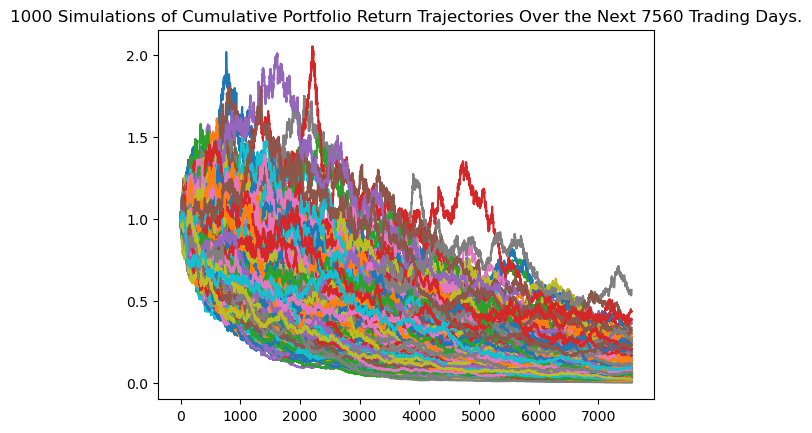

In [206]:
# Plot simulation outcomes
line_plot = mc_thirty_year.plot_simulation()

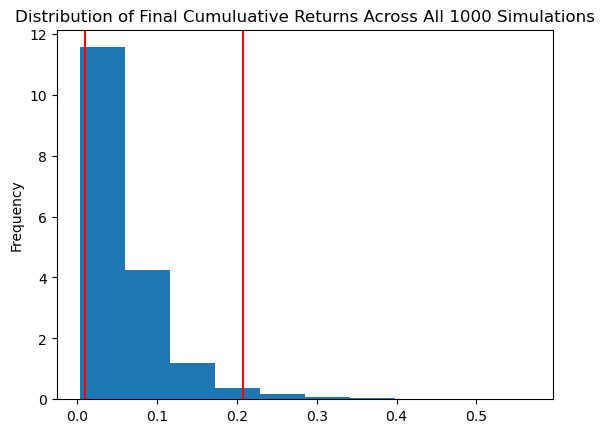

In [207]:
# Plot probability distribution and confidence intervals
dist_plot = mc_thirty_year.plot_distribution()

### Retirement Analysis

In [208]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = mc_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           1000.000000
mean               0.059472
std                0.055895
min                0.002833
25%                0.025157
50%                0.043284
75%                0.072165
max                0.567798
95% CI Lower       0.009502
95% CI Upper       0.208066
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [233]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8] * initial_investment, 2)
ci_upper = round(even_tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $2709.26 and $17021.12


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [224]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8] * initial_investment, 2)
ci_upper = round(even_tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $9665.05 and $32900.43


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [218]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
mc_five_year = MCSimulation(
	portfolio_data = df_stock_data,
	weights = [.40, .60],
	num_simulation = 1000,
	num_trading_days = 252*5
)

In [219]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/leandrohugo/Desktop/Assignments/Mod5-cFP/Instructions Mod5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.018902,1.008821,0.992540,1.001937,1.003101,0.985666,0.993542,0.994139,0.988166,0.997610,...,1.007430,1.006583,1.001626,0.991686,0.984569,0.991559,0.995167,0.997067,0.997998,0.994788
2,1.008903,1.021453,0.994345,1.007680,0.990398,0.981841,0.977885,0.985388,0.990199,0.999325,...,1.010859,1.001678,1.002617,0.992979,0.990435,0.988299,0.995615,0.994010,0.988324,0.995999
3,0.992031,1.010854,0.996636,1.014710,0.995305,0.983878,0.995162,0.994933,0.983528,0.982988,...,1.017806,0.985322,1.009564,0.988544,0.987377,0.988094,0.995561,0.985925,0.995120,0.982994
4,0.995939,1.008425,0.992229,1.031802,1.000374,0.977473,1.001196,0.997044,1.001751,0.989747,...,0.992580,1.001103,1.007872,0.984860,0.999741,0.976762,0.996965,1.001256,0.988305,0.972342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.415494,0.635363,0.505783,0.723963,0.288214,0.677792,0.394297,0.395921,0.412350,0.515356,...,0.641284,0.650682,0.521611,0.703457,0.498777,0.430153,0.960989,0.866765,0.369287,0.578678
1257,0.421598,0.632595,0.512249,0.722438,0.287691,0.682218,0.393120,0.391502,0.415027,0.507716,...,0.639301,0.641877,0.519040,0.694994,0.504055,0.435428,0.962576,0.846190,0.371211,0.579524
1258,0.418299,0.635605,0.504523,0.722245,0.287162,0.690728,0.399466,0.392836,0.408656,0.507251,...,0.653733,0.633626,0.523622,0.697892,0.504149,0.437024,0.962578,0.834508,0.376247,0.578734
1259,0.413865,0.633809,0.504048,0.720407,0.292861,0.699795,0.399230,0.396722,0.408424,0.504785,...,0.661784,0.642788,0.519558,0.706044,0.502332,0.439709,0.961417,0.826906,0.373984,0.581339


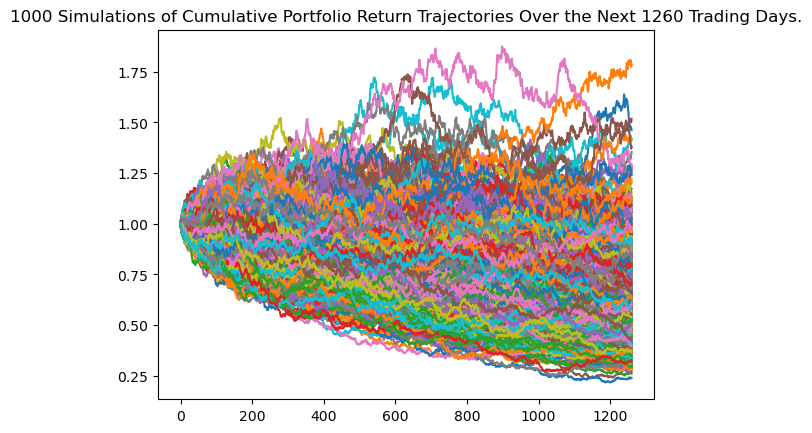

In [220]:
# Plot simulation outcomes
line_plot = mc_five_year.plot_simulation()

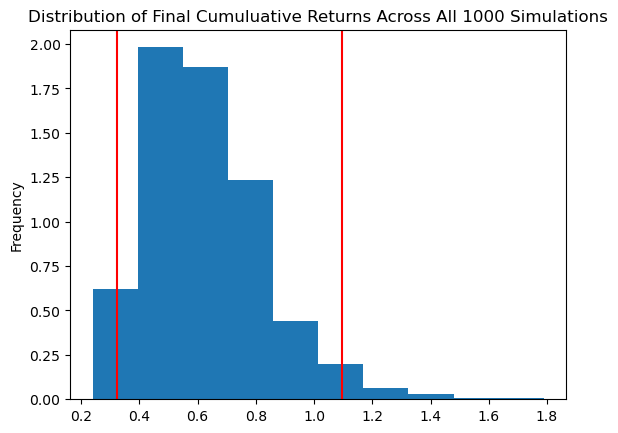

In [221]:
# Plot probability distribution and confidence intervals
dist_plot = mc_five_year.plot_distribution()

In [222]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = mc_five_year.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           1000.000000
mean               0.627882
std                0.203464
min                0.239984
25%                0.483548
50%                0.597463
75%                0.741367
max                1.788854
95% CI Lower       0.322168
95% CI Upper       1.096681
Name: 1260, dtype: float64


In [225]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl[8] * initial_investment, 2)
ci_upper_five = round(even_tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $19330.1 and $65800.85


### Ten Years Retirement Option

In [227]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mc_ten_year = MCSimulation(
	portfolio_data = df_stock_data,
	weights = [.40, .60],
	num_simulation = 1000,
	num_trading_days = 252*10
)

In [228]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/leandrohugo/Desktop/Assignments/Mod5-cFP/Instructions Mod5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012957,1.005765,1.003237,1.004993,0.990475,0.999843,0.983043,1.006302,0.993365,1.012848,...,0.988958,0.995691,0.996446,0.996630,1.001128,1.000067,0.994161,0.992941,0.983512,1.005179
2,1.008949,0.989890,0.991913,1.015373,1.006225,0.985021,0.976678,1.012643,1.002355,1.016453,...,0.983771,1.001185,0.984265,0.992869,0.998798,0.990898,0.982847,0.994408,0.991176,1.010082
3,0.998782,0.997635,1.004398,1.020610,1.009331,0.988086,0.973241,1.006450,0.996260,1.010353,...,0.972632,1.005358,0.979395,0.998393,1.010504,0.990553,0.989569,0.995472,1.000820,1.024101
4,0.995247,0.988466,1.009515,1.028166,1.011562,0.984176,0.974171,1.006456,1.006049,1.012107,...,0.986963,0.997459,0.971470,0.999454,1.007871,1.002959,0.976807,0.986558,1.013020,1.032549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.568658,0.315666,0.383519,0.279209,0.461784,0.694464,0.236144,0.201290,0.220750,0.398509,...,0.298864,0.337750,0.376824,0.904809,0.256755,0.335057,0.280612,0.263391,0.158395,0.302943
2517,0.570995,0.318593,0.379324,0.273642,0.465901,0.684214,0.233483,0.198381,0.220516,0.398983,...,0.302120,0.334050,0.374104,0.909750,0.258580,0.339119,0.278275,0.264833,0.158592,0.304637
2518,0.566776,0.317518,0.377865,0.273444,0.470042,0.679517,0.231870,0.196775,0.222802,0.399997,...,0.297490,0.331660,0.372261,0.903003,0.258833,0.341611,0.272783,0.262521,0.158993,0.308728
2519,0.565727,0.320160,0.377051,0.272722,0.476716,0.678915,0.230930,0.200180,0.224236,0.395526,...,0.299154,0.333965,0.373653,0.900993,0.260172,0.341551,0.271914,0.259636,0.157908,0.303536


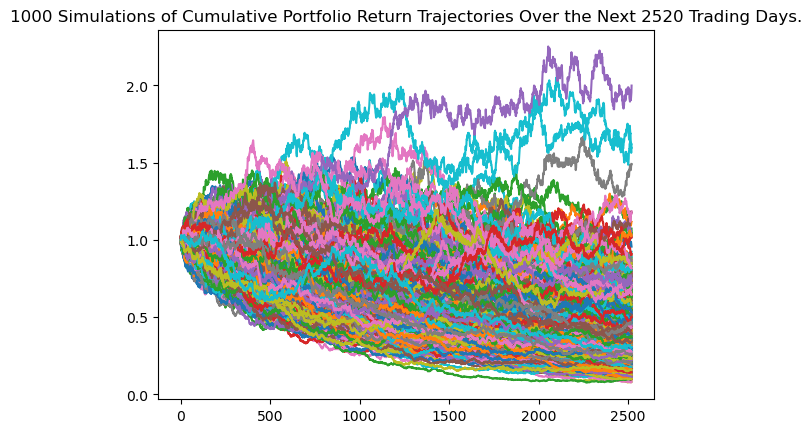

In [229]:
# Plot simulation outcomes
line_plot = mc_ten_year.plot_simulation()

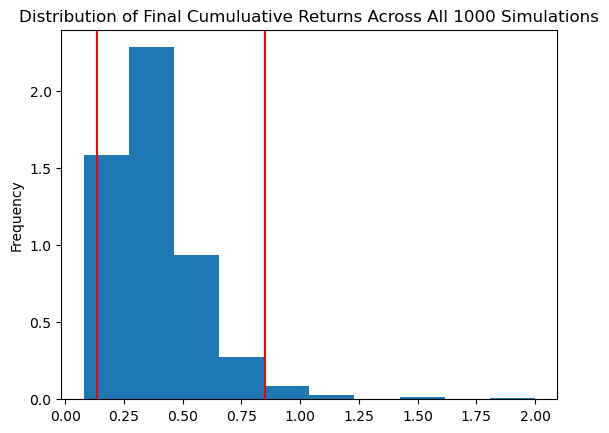

In [230]:
# Plot probability distribution and confidence intervals
dist_plot = mc_ten_year.plot_distribution()

In [231]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = mc_ten_year.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           1000.000000
mean               0.382340
std                0.193288
min                0.079840
25%                0.249148
50%                0.347523
75%                0.466240
max                1.998936
95% CI Lower       0.135463
95% CI Upper       0.851056
Name: 2520, dtype: float64


In [232]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl[8] * initial_investment, 2)
ci_upper_ten = round(even_tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $8127.78 and $51063.35
